# **Data Exploration and Understanding**

# Imports and Initial Setup

In [599]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading Data

In [600]:
# Load the dataset
data  = pd.read_csv("laptop.csv")

# Show first few rows of the dataset
data.head()


,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Shape and Column Information

In [601]:
# Check the shape of the dataset (rows, columns)
data.shape

(1303, 13)

In [602]:
# Display the columns of the dataset
data.columns


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

# **Data Preprocessing**

# Drop Unnecessary Columns

In [603]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'], inplace=True)


#  Check for Missing Values

In [604]:
# Check general info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [605]:
# Check for missing values
data.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [606]:
# Percentage of missing values per column
data.isnull().mean() * 100

Company             2.302379
TypeName            2.302379
Inches              2.302379
ScreenResolution    2.302379
Cpu                 2.302379
Ram                 2.302379
Memory              2.302379
Gpu                 2.302379
OpSys               2.302379
Weight              2.302379
Price               2.302379
dtype: float64

# Filling Missing Values with Mode

In [607]:
# Fill missing values with mode (most frequent value) for categorical columns
data['Company'] = data['Company'].fillna(data['Company'].mode()[0])
data['TypeName'] = data['TypeName'].fillna(data['TypeName'].mode()[0])
data['OpSys'] = data['OpSys'].fillna(data['OpSys'].mode()[0])
data['ScreenResolution'] = data['ScreenResolution'].fillna(data['ScreenResolution'].mode()[0])
data['Cpu'] = data['Cpu'].fillna(data['Cpu'].mode()[0])
data['Memory'] = data['Memory'].fillna(data['Memory'].mode()[0])
data['Gpu'] = data['Gpu'].fillna(data['Gpu'].mode()[0])


In [608]:
# Check if there are still any missing values
data.isnull().sum()

Company              0
TypeName             0
Inches              30
ScreenResolution     0
Cpu                  0
Ram                 30
Memory               0
Gpu                  0
OpSys                0
Weight              30
Price               30
dtype: int64

# Boxplots for Visualizing Outliers

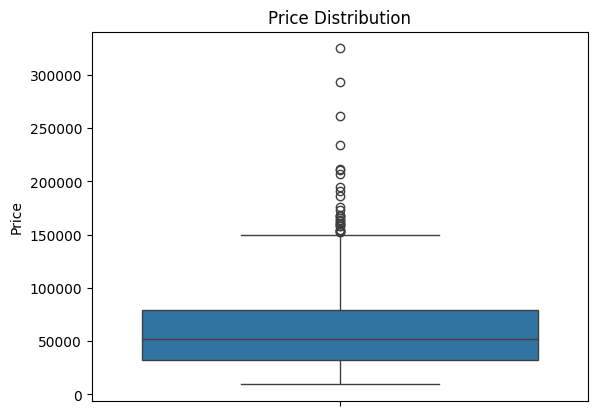

In [609]:
# Boxplot for 'Price' to check for outliers
sns.boxplot(data['Price'])
plt.title("Price Distribution")
plt.show()


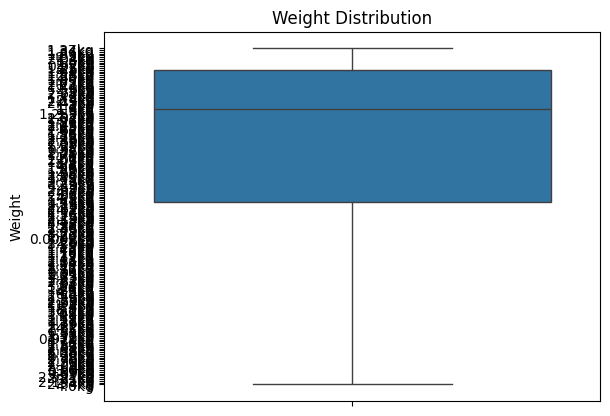

In [610]:
# Boxplot for 'Weight' to check for outliers
sns.boxplot(data['Weight'])
plt.title("Weight Distribution")
plt.show()

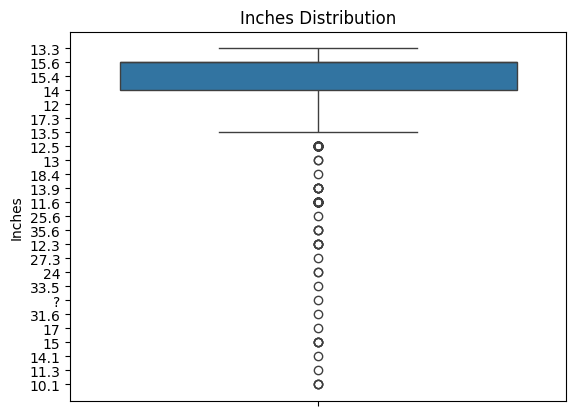

In [611]:
# Boxplot for 'Inches' to check for outliers
sns.boxplot(data['Inches'])
plt.title("Inches Distribution")
plt.show()

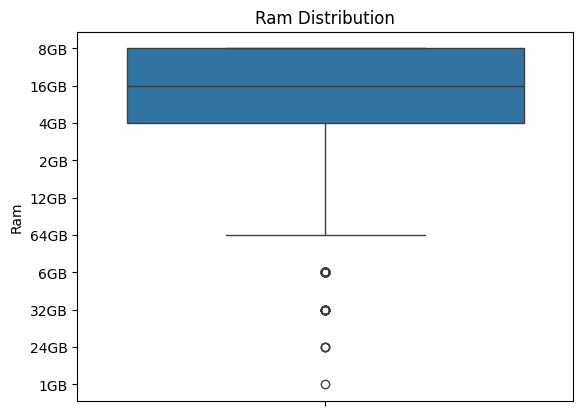

In [612]:
# Boxplot for 'Ram' to check for outliers
sns.boxplot(data['Ram'])
plt.title("Ram Distribution")
plt.show()

# Converting Data Types (Inches, Ram, Weight)

In [613]:
# Convert 'Inches' to numeric (with error handling)
data['Inches'] = pd.to_numeric(data['Inches'], errors='coerce')
# Fill missing values for 'Inches'with their respective medians
data['Inches'] = data['Inches'].fillna(data['Inches'].median())


In [614]:
data['Inches'].head()

0    13.3
1    13.3
2    15.6
3    15.4
4    13.3
Name: Inches, dtype: float64

In [615]:
# Extract numeric values as strings
data['Ram'] = data['Ram'].str.extract('(\d+)')

# Convert the extracted values to numeric type (float or int)
data['Ram'] = pd.to_numeric(data['Ram'], errors='coerce')

# # Fill missing values for 'Ram' with their respective medians
data['Ram'] = data['Ram'].fillna(data['Ram'].median()).astype(int)

# Verify the result
data['Ram'].head()


0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: int32

In [616]:
# Convert 'Weight' to numeric (with error handling)
data['Weight'] = data['Weight'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
# Fill missing values for 'Weight' with their respective medians
data['Weight'] = data['Weight'].fillna(data['Weight'].median())

In [617]:
data['Weight'].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64

In [618]:
# Fill missing values for 'Price'' with their respective medians
data['Price'] = data['Price'].fillna(data['Price'].median())

In [619]:
data['Price'].head()

0     71378.6832
1     47895.5232
2     30636.0000
3    135195.3360
4     96095.8080
Name: Price, dtype: float64

In [620]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# General Statistical Summary

In [621]:
# Statistical summary of the dataset
data.describe(include='all')


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
count,1303,1303,1303.000000,1303,1303,1303.000000,1303,1303,1303,1303.000000,1303.000000
unique,19,6,NaN,40,118,NaN,40,110,9,NaN,NaN
top,Lenovo,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,NaN,256GB SSD,Intel HD Graphics 620,Windows 10,NaN,NaN
freq,320,740,NaN,525,213,NaN,431,301,1077,NaN,NaN
mean,NaN,NaN,15.141980,NaN,NaN,8.452034,NaN,NaN,NaN,2.076723,59776.350664
std,NaN,NaN,1.932353,NaN,NaN,5.500367,NaN,NaN,NaN,0.798154,36918.177592
min,NaN,NaN,10.100000,NaN,NaN,1.000000,NaN,NaN,NaN,0.000200,9270.720000
25%,NaN,NaN,14.000000,NaN,NaN,4.000000,NaN,NaN,NaN,1.540000,32650.250400
50%,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,2.040000,52161.120000
75%,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,2.310000,78561.360000


# **Feature Engineering**

# **Univariate Analysis**

# Count Plot for Companies

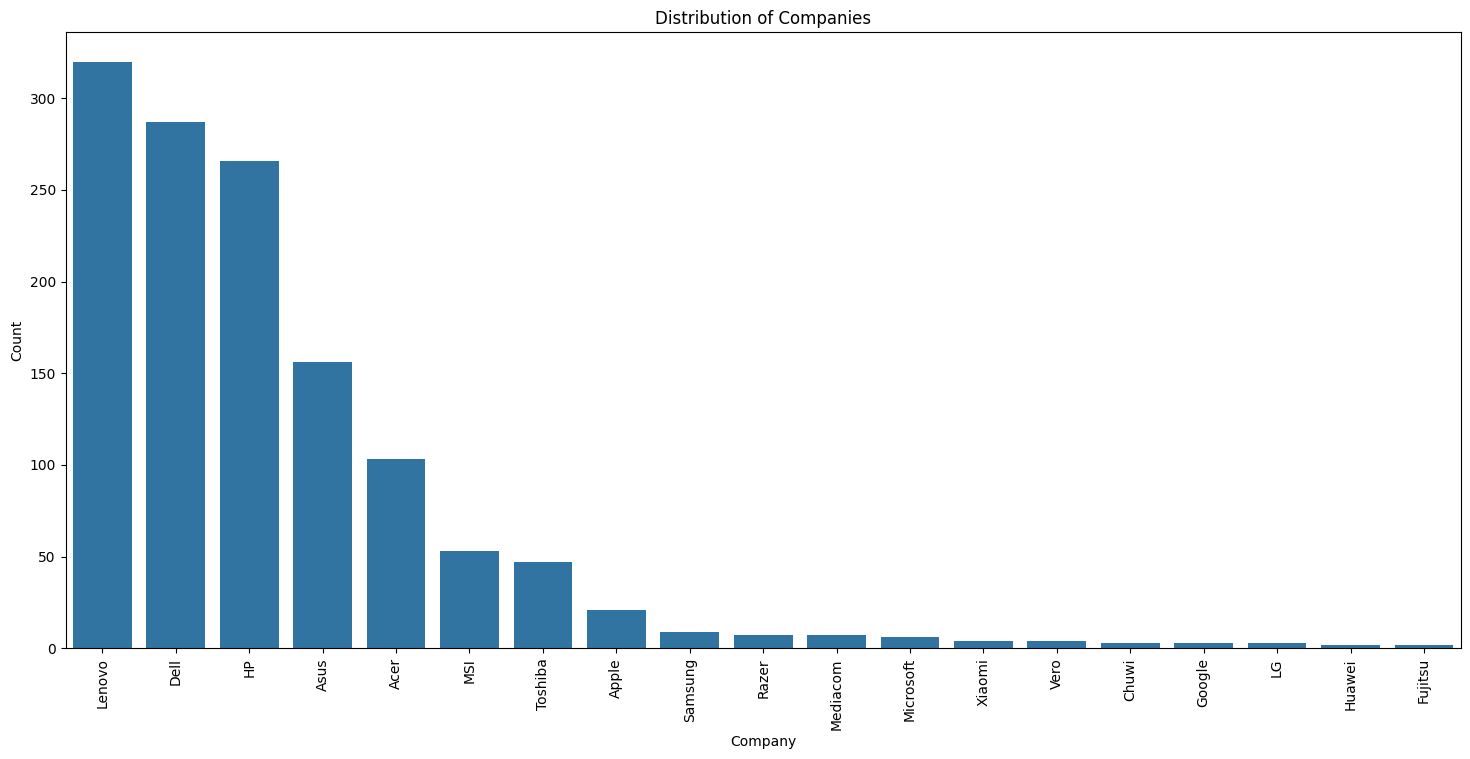

In [622]:
# Count occurrences of each company
company_counts = data['Company'].value_counts()

# Plot the countplot with companies ordered by frequency
plt.figure(figsize=(18, 8))
sns.countplot(x=data['Company'], order=company_counts.index)
plt.title("Distribution of Companies")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


# Price Distribution

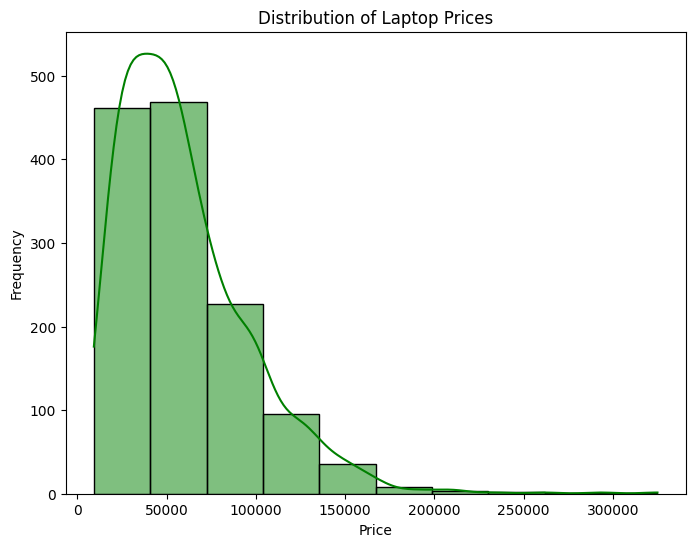

In [623]:
# Distribution of laptop prices
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], kde=True, bins=10, color='green')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# Weight Distribution

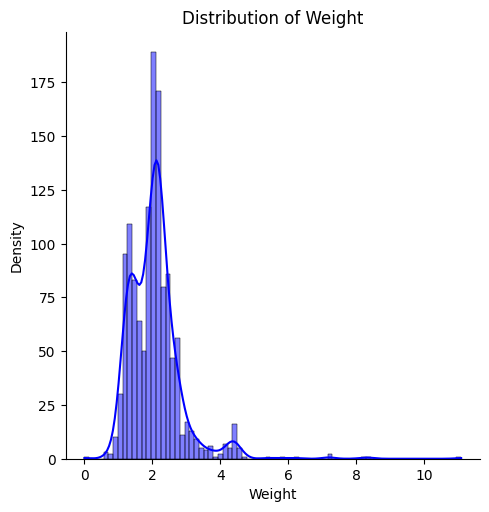

In [624]:
# Distribution of laptop weights
sns.displot(data['Weight'], color='blue', kde=True)
plt.title("Distribution of Weight")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.show()


# Ram Distribution

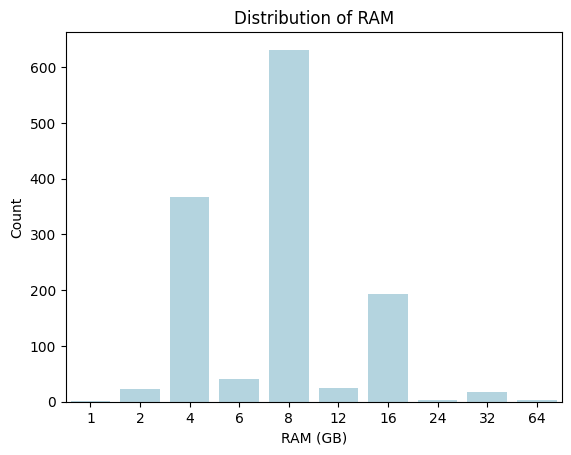

In [625]:
# Distribution of 'Ram' column
sns.countplot(x=data['Ram'], color='lightblue')
plt.title("Distribution of RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.show()


# TypeName Distribution


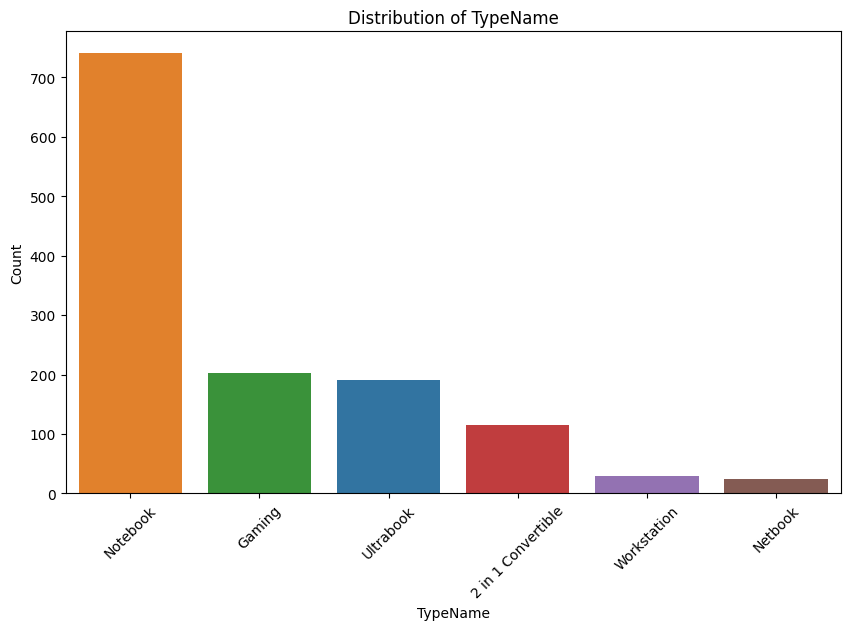

In [626]:
# Distribution of laptop types
ordered_categories = data['TypeName'].value_counts().index  # Order by frequency
plt.figure(figsize=(10, 6))
sns.countplot(x=data['TypeName'], hue=data['TypeName'], order=ordered_categories, legend=False)
plt.title("Distribution of TypeName")
plt.xlabel('TypeName')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# **Bivariate Analysis**

# Company vs Price

C:\Users\harsh\AppData\Local\Temp\ipykernel_6072\2211195733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Price', data=data, palette='Accent')


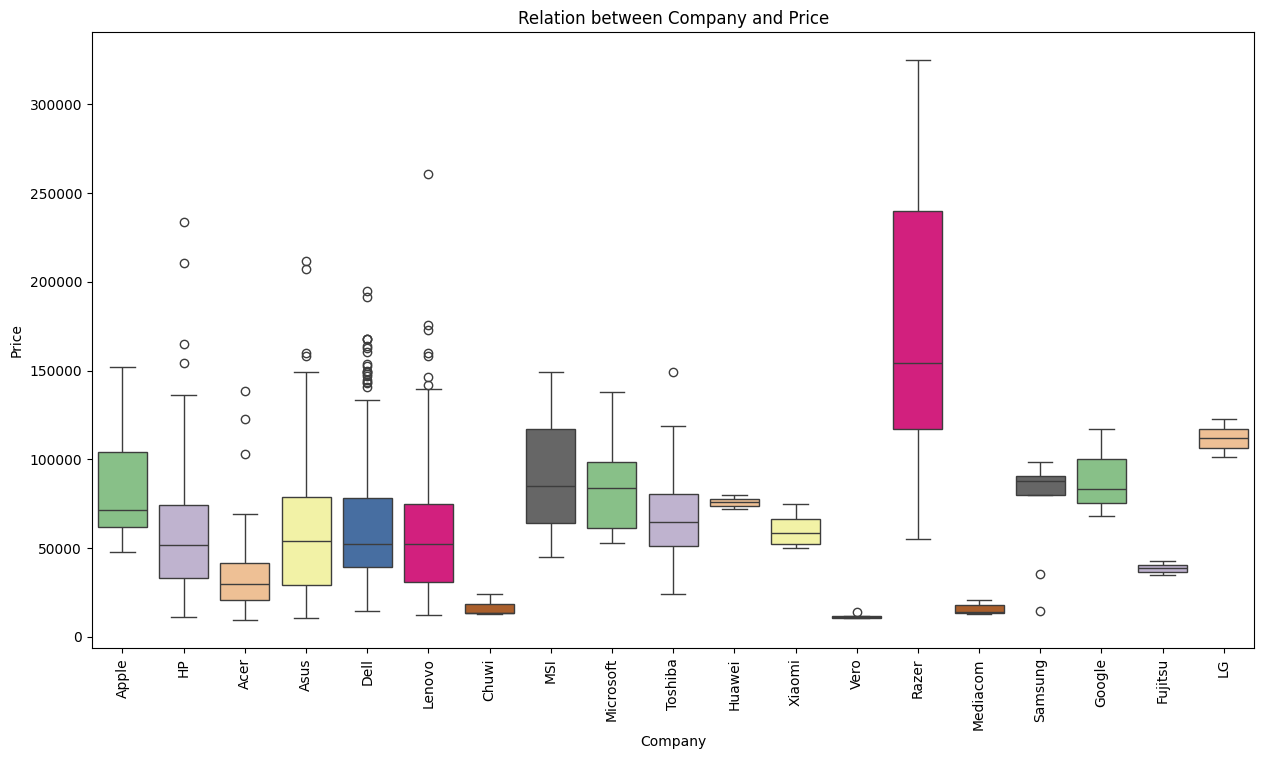

In [627]:
# Boxplot showing the relationship between company and price
plt.figure(figsize=(15, 8))
sns.boxplot(x='Company', y='Price', data=data, palette='Accent')
plt.title("Relation between Company and Price")
plt.xlabel("Company")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


### On above bar plot tells that Razer company have more price that is more than 3 lakhs.

# Inches vs Price

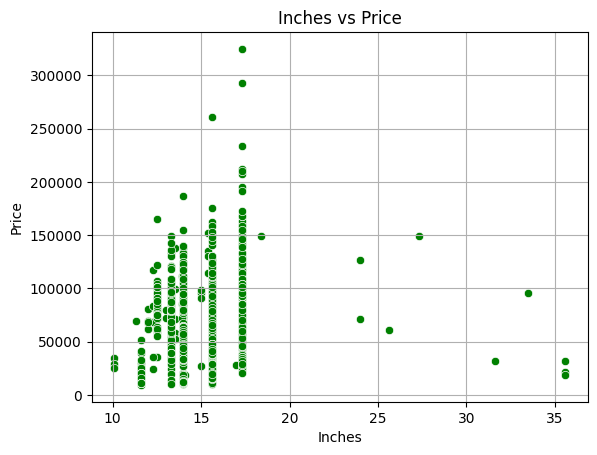

In [628]:
# Scatter plot for Inches vs Price
sns.scatterplot(x=data['Inches'], y=data['Price'], color='green')
plt.title('Inches vs Price')
plt.xlabel('Inches')
plt.ylabel('Price')
plt.grid(True)
plt.show()


### On above plot the 17 Inches of laptops have more price compared to others.

# Ram vs Price

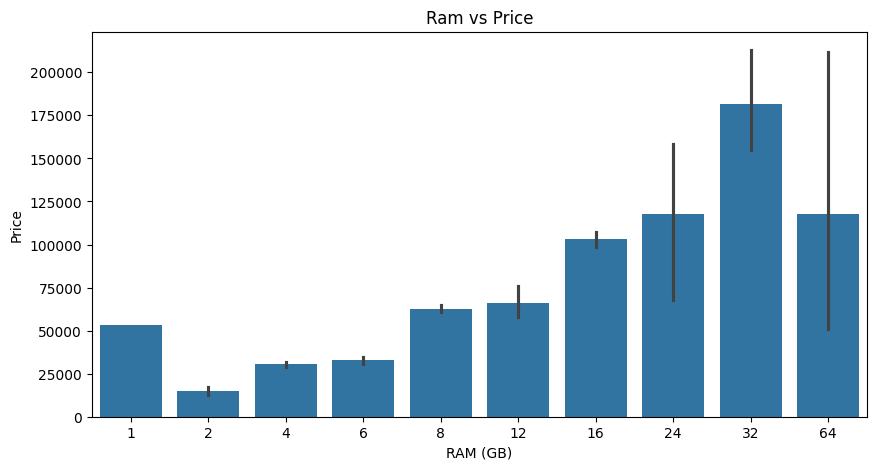

In [629]:
# Bar plot for Ram vs Price
plt.figure(figsize=(10, 5))
sns.barplot(x='Ram', y='Price', data=data)
plt.title("Ram vs Price")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.show()


# PRICE AND TYPENAME GRAPH

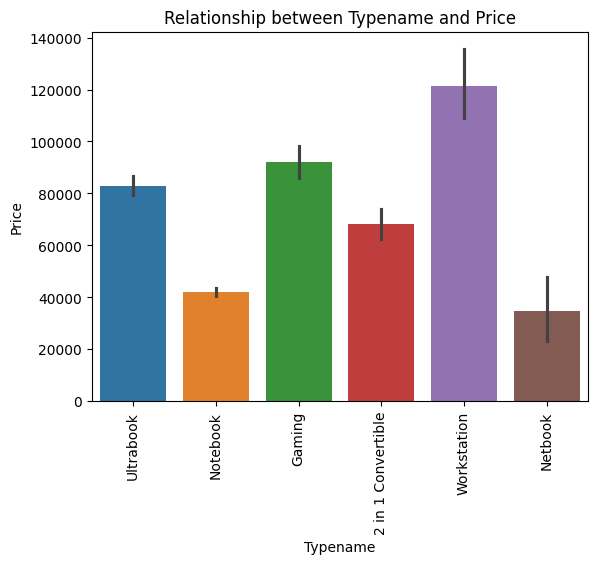

In [630]:
sns.barplot(x=data['TypeName'], y=data['Price'], hue=data['TypeName'], dodge=False)

plt.xticks(rotation='vertical')
plt.title("Relationship between Typename and Price")
plt.xlabel("Typename")
plt.ylabel("Price")
plt.show()

### Workstation typename of laptops have more price than others.

# weight and price

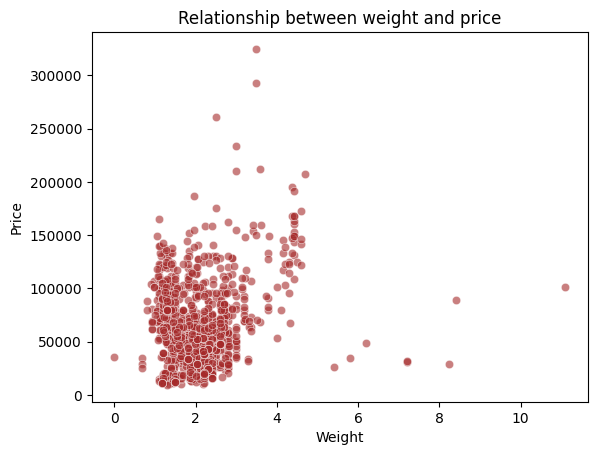

In [631]:
sns.scatterplot(x=data['Weight'], y=data['Price'], color='brown', alpha=0.6)
plt.title("Relationship between weight and price")
plt.xlabel("Weight")
plt.ylabel("Price")
plt.show()

### Almost all the laptops weight betweeen in 1 - 3 have more price.

# Screen Resolution and Price

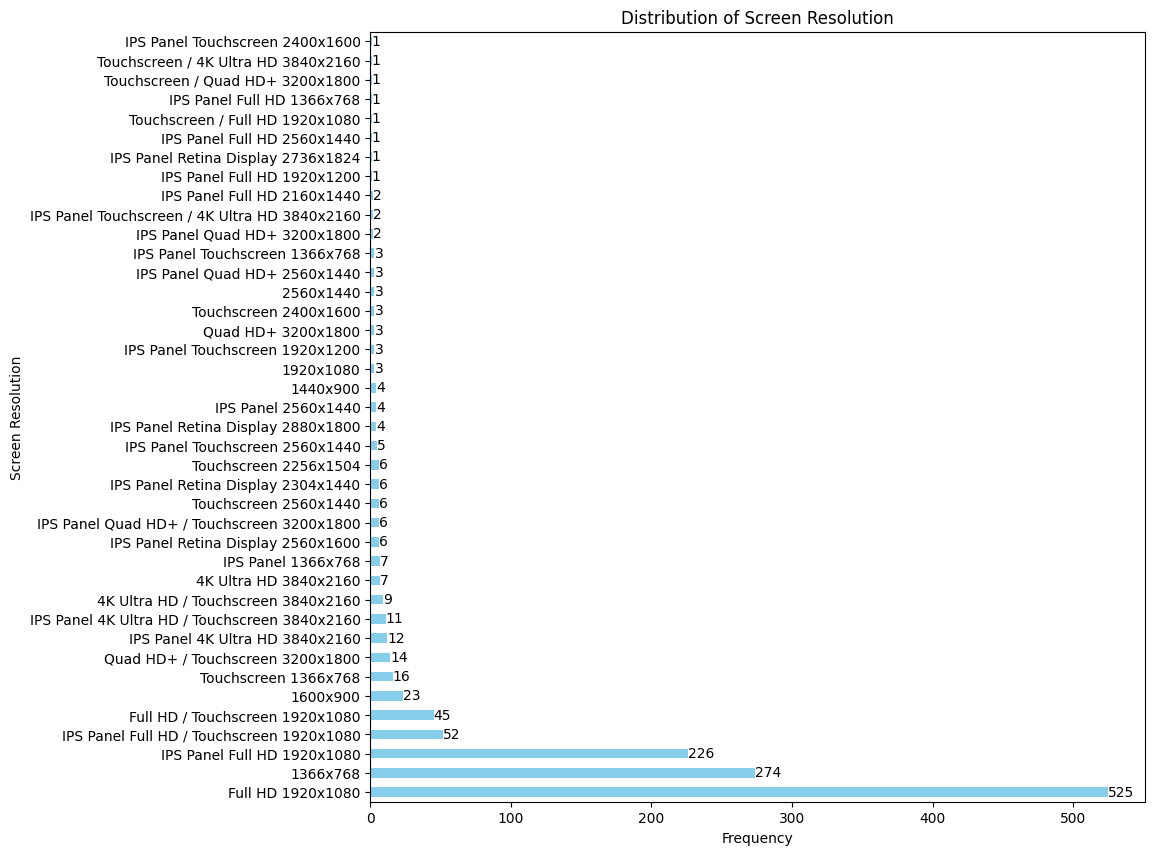

In [632]:
# Sorting the values for better readability
resolution_counts = data['ScreenResolution'].value_counts().sort_values(ascending=False)

# Creating the horizontal bar plot
plt.figure(figsize=(10, 10))
ax = resolution_counts.plot(kind='barh', color='skyblue')
plt.title("Distribution of Screen Resolution")
plt.xlabel("Frequency")
plt.ylabel("Screen Resolution")

# Adding the frequency labels on top of the bars
for index, value in enumerate(resolution_counts):
    ax.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.show()


#  Screen Resolution - Touchscreen

In [633]:
# Creating new columns for Touchscreen and IPS
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x: 1 if isinstance(x, str) and "Touchscreen" in x else 0)

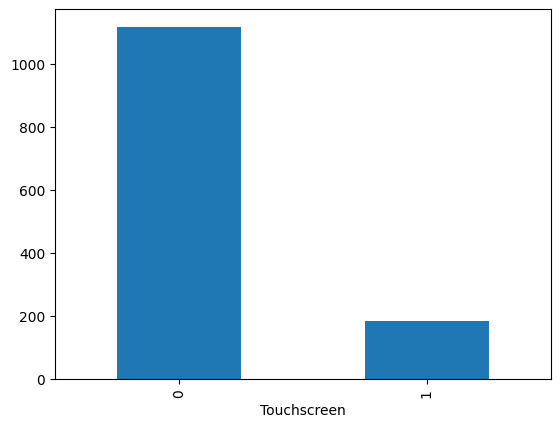

In [634]:

data['Touchscreen'].value_counts().plot(kind='bar')
plt.show()

### On above graph 0 represents the laptop does not contains touchsreen and 1 represents the touchsreen . Most of the laptop does not contains touchscreen of given data

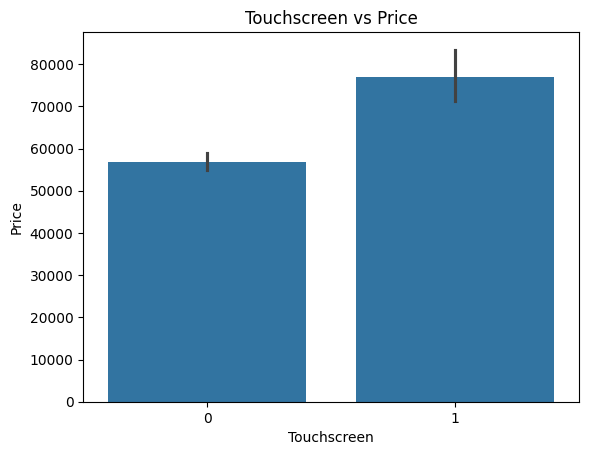

In [635]:

# Bar plot for Touchscreen vs Price
sns.barplot(x=data['Touchscreen'], y=data['Price'])
plt.title("Touchscreen vs Price")
plt.xlabel("Touchscreen")
plt.ylabel("Price")
plt.show()



### If laptop have Touchscreen,price of laptops is high than non-touchscreen laptops.

# Screen Resolution - IPS

In [636]:
# Creating new columns for Touchscreen and IPS
data["IPS"]=data["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

<Axes: xlabel='IPS'>

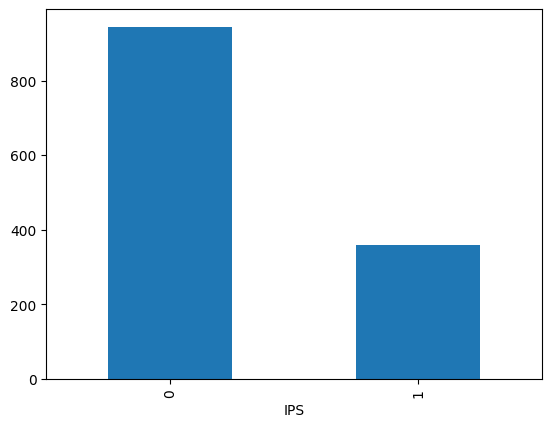

In [637]:

data['IPS'].value_counts().plot(kind='bar')

### In given data laptop contins less IPS pannel.

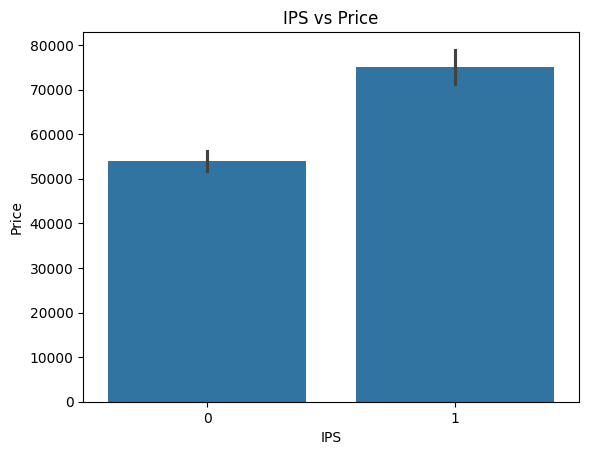

In [638]:
# Bar plot for IPS vs Price
sns.barplot(x=data['IPS'], y=data['Price'])
plt.title("IPS vs Price")
plt.xlabel("IPS")
plt.ylabel("Price")
plt.show()


### If laptop have IPS pannel it has more price rather than not IPS pannel.

# Extract the Resolution

In [639]:
# Extracting resolution
new = data["ScreenResolution"].str.extract(r'(\d+)x(\d+)')


In [640]:
# Assign X_res and Y_res
data['X_res'] = new[0].astype(int)  # First captured group
data['Y_res'] = new[1].astype(int)  # Second captured group


In [641]:
# Calculate Pixel Per Inch (ppi)
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5 / data['Inches']).astype('float')


In [642]:
# Verify results
data[['ScreenResolution', 'X_res', 'Y_res','ppi']].head()

,ScreenResolution,X_res,Y_res,ppi
0,IPS Panel Retina Display 2560x1600,2560,1600,226.983005
1,1440x900,1440,900,127.677940
2,Full HD 1920x1080,1920,1080,141.211998
3,IPS Panel Retina Display 2880x1800,2880,1800,220.534624
4,IPS Panel Retina Display 2560x1600,2560,1600,226.983005


In [643]:

# Drop 'Inches' column
data.drop(columns=['Inches'], inplace=True)

# Drop 'ScreenResolution' column
data.drop(columns=['ScreenResolution', 'X_res', 'Y_res'], inplace=True)

In [644]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [645]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float64
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  ppi          1303 non-null   float64
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 117.2+ KB


# Extract the  CPU Name

In [646]:
# Extract CPU Name: First 3 words from the 'Cpu' column
data['Cpu Name'] = data['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

# Function to categorize CPU brands
def fetch_processor(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif text.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

# Apply the function to create a new column 'Cpu brand'
data['Cpu brand'] = data['Cpu Name'].apply(fetch_processor)



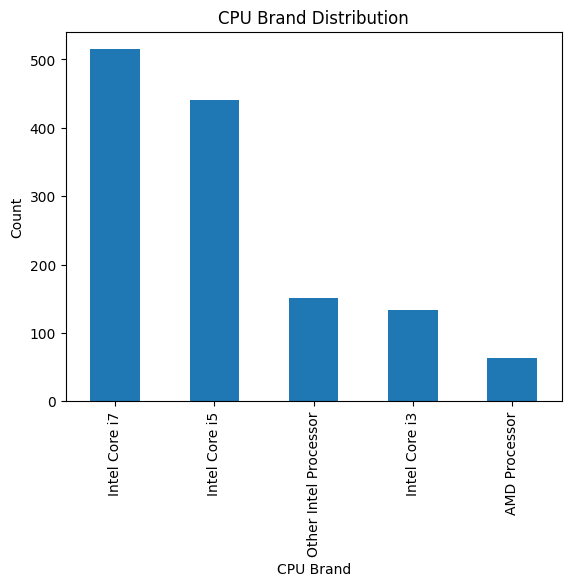

In [647]:
# Plot CPU brand distribution
data['Cpu brand'].value_counts().plot(kind='bar', title='CPU Brand Distribution')
plt.xlabel('CPU Brand')
plt.ylabel('Count')
plt.show()

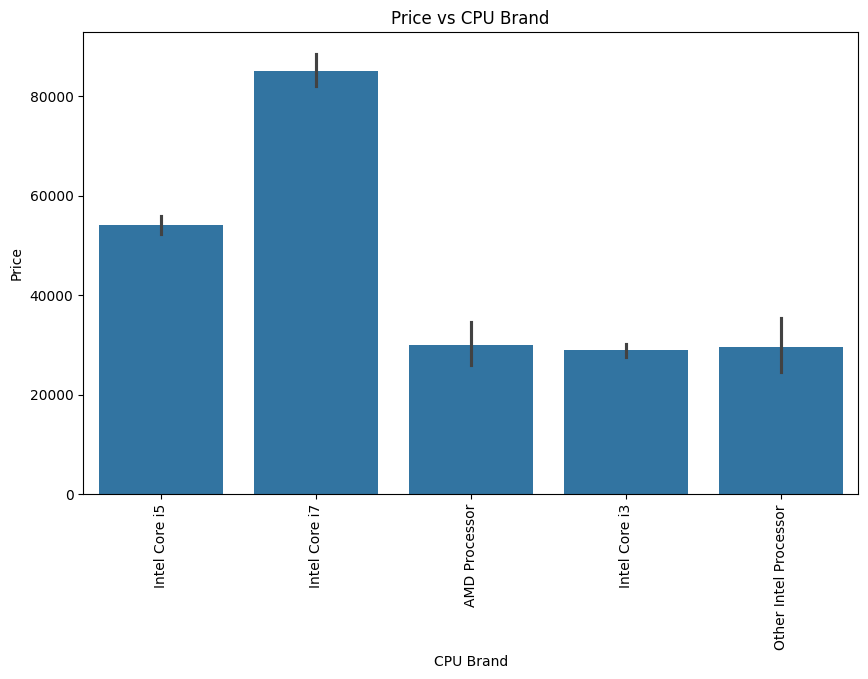

In [648]:
# Seaborn barplot to visualize price based on CPU brand
plt.figure(figsize=(10, 6))
sns.barplot(x='Cpu brand', y='Price', data=data)
plt.xticks(rotation='vertical')
plt.title('Price vs CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Price')
plt.show()



In [649]:
# Drop 'Cpu' column
data.drop(columns=['Cpu','Cpu Name'], inplace=True)

In [650]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


### On above graph Intel core i7 cpu have more and followed by interl core i5

#  Transform the 'Memory' column

In [651]:
print(data['Memory'])

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object


In [652]:
# Preprocessing
# Step 1: Clean and transform the 'Memory' column
data['Memory'] = data['Memory'].astype(str).replace('.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')

# Step 2: Split 'Memory' into two parts
new = data["Memory"].str.split("+", n=1, expand=True)
data["first"] = new[0].str.strip()
data["second"] = new[1]

# Step 3: Remove invalid characters from 'first' and 'second'
data["first"] = data["first"].str.extract(r'(\d+)', expand=False).fillna("0")
data["second"] = data["second"].str.extract(r'(\d+)', expand=False).fillna("0")

# Step 4: Create indicator columns for storage types
data["Layer1HDD"] = data["Memory"].apply(lambda x: 1 if "HDD" in x.split("+")[0] else 0)
data["Layer1SSD"] = data["Memory"].apply(lambda x: 1 if "SSD" in x.split("+")[0] else 0)
data["Layer2HDD"] = data["Memory"].apply(lambda x: 1 if len(x.split("+")) > 1 and "HDD" in x.split("+")[1] else 0)
data["Layer2SSD"] = data["Memory"].apply(lambda x: 1 if len(x.split("+")) > 1 and "SSD" in x.split("+")[1] else 0)

# Step 5: Convert 'first' and 'second' to integers
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)

# Step 6: Calculate total HDD and SSD values
data["HDD"] = (data["first"] * data["Layer1HDD"] + data["second"] * data["Layer2HDD"])
data["SSD"] = (data["first"] * data["Layer1SSD"] + data["second"] * data["Layer2SSD"])


In [653]:
data = data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer2HDD', 'Layer2SSD'])


In [654]:
# Drop 'Memory' column
data.drop(columns=['Memory'], inplace=True)

In [655]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


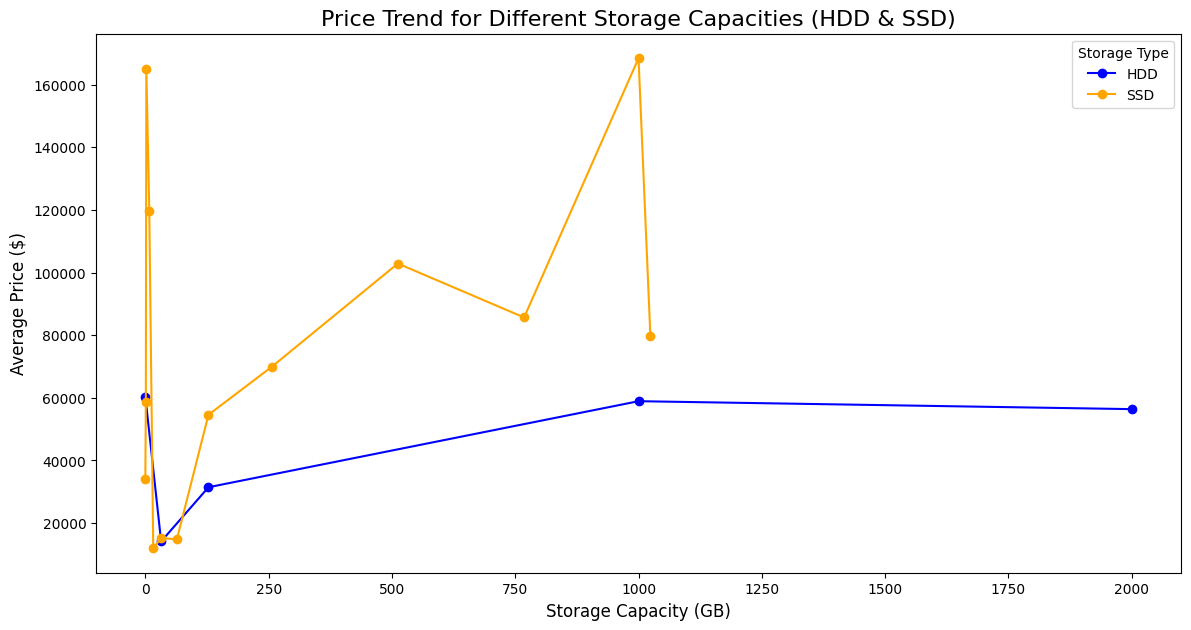

In [656]:
# Aggregate data by HDD and SSD with mean price
hdd_price = data.groupby('HDD')['Price'].mean().reset_index()
ssd_price = data.groupby('SSD')['Price'].mean().reset_index()

plt.figure(figsize=(14, 7))

# Line plot for HDD
plt.plot(hdd_price['HDD'], hdd_price['Price'], label='HDD', color='blue', marker='o')

# Line plot for SSD
plt.plot(ssd_price['SSD'], ssd_price['Price'], label='SSD', color='orange', marker='o')

# Add labels and title
plt.title('Price Trend for Different Storage Capacities (HDD & SSD)', fontsize=16)
plt.xlabel('Storage Capacity (GB)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)

# Add legend
plt.legend(title='Storage Type')

# Show the plot
plt.show()


# GPU(Graphical Processing Unit) 

In [657]:
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
data = data[data['Gpu_brand'] != 'ARM']
data.drop(columns=['Gpu'],inplace=True)

In [658]:
data.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


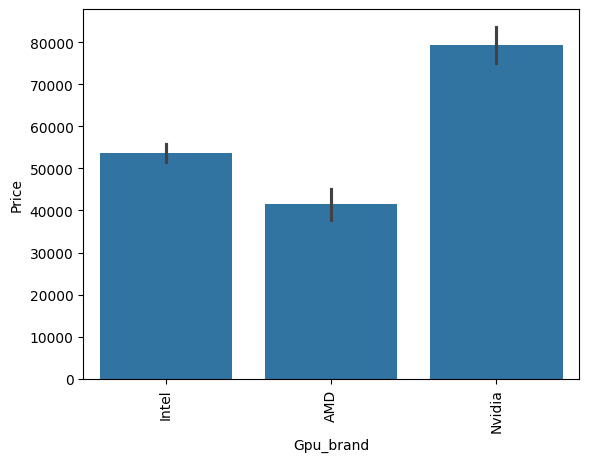

In [659]:

sns.barplot(x=data['Gpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

### The Graphics processing unit of Nvidia brand have more price than others.

# operative system 

C:\Users\harsh\AppData\Local\Temp\ipykernel_6072\3892315117.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OpSys', y='Price', data=df_sorted, palette='Accent')


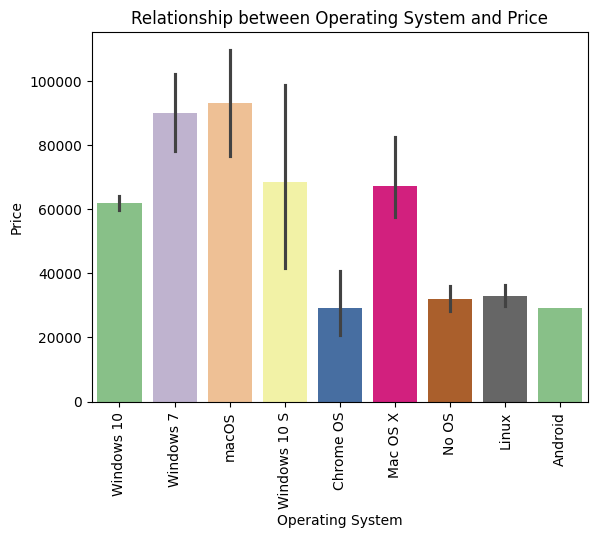

In [660]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Price'
df_sorted = data.sort_values('Price', ascending=False)

# Create a barplot with sorted values
sns.barplot(x='OpSys', y='Price', data=df_sorted, palette='Accent')

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel("Operating System")
plt.ylabel("Price")
plt.title("Relationship between Operating System and Price")

# Show the plot
plt.show()


### Mac operative system have more price than others operative system.

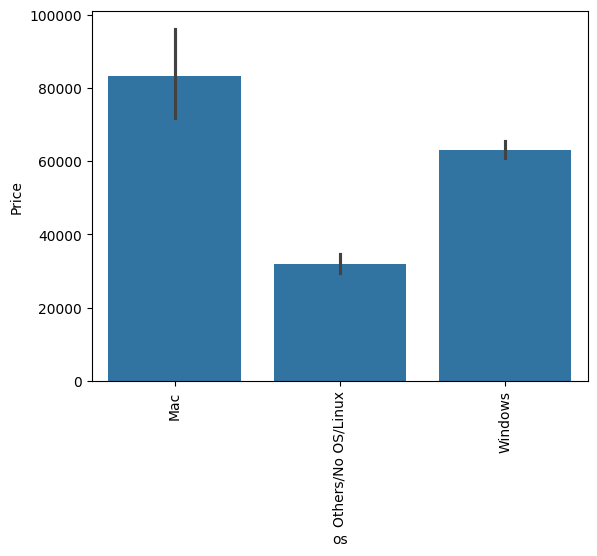

In [661]:
# Function to categorize the operating system
def cat_os(inp):
    os_map = {
        'Windows 10': 'Windows',
        'Windows 7': 'Windows',
        'Windows 10 S': 'Windows',
        'macOS': 'Mac',
        'Mac OS X': 'Mac'
    }
    return os_map.get(inp, 'Others/No OS/Linux')

# Apply the function to the 'OpSys' column
data['os'] = data['OpSys'].apply(cat_os)

# Drop the original 'OpSys' column
data.drop(columns=['OpSys'], inplace=True)

# Plot Price against Operating System
sns.barplot(x='os', y='Price', data=data)
plt.xticks(rotation='vertical')
plt.show()


In [662]:
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [663]:
data.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'IPS',
       'ppi', 'Cpu brand', 'HDD', 'SSD', 'Gpu_brand', 'os'],
      dtype='object')

# Encoding

 Nominal encoding to these columns.Becuase these columns does not have any order

In [664]:
data_model = pd.get_dummies(data, columns=['Company', 'TypeName', 'Cpu brand', 'Gpu_brand', 'os'], drop_first=True)

In [665]:
data_model.head()

,Ram,Weight,Price,Touchscreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,71378.6832,0,1,226.983005,0,128,True,False,...,True,False,False,True,False,False,True,False,False,False
1,8,1.34,47895.5232,0,0,127.677940,0,0,True,False,...,True,False,False,True,False,False,True,False,False,False
2,8,1.86,30636.0000,0,0,141.211998,0,256,False,False,...,False,False,False,True,False,False,True,False,True,False
3,16,1.83,135195.3360,0,1,220.534624,0,512,True,False,...,True,False,False,False,True,False,False,False,False,False
4,8,1.37,96095.8080,0,1,226.983005,0,256,True,False,...,True,False,False,True,False,False,True,False,False,False


In [666]:
data_model.columns

Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'IPS', 'ppi', 'HDD', 'SSD',
       'Company_Apple', 'Company_Asus', 'Company_Chuwi', 'Company_Dell',
       'Company_Fujitsu', 'Company_Google', 'Company_HP', 'Company_Huawei',
       'Company_LG', 'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'Cpu brand_Intel Core i3',
       'Cpu brand_Intel Core i5', 'Cpu brand_Intel Core i7',
       'Cpu brand_Other Intel Processor', 'Gpu_brand_Intel',
       'Gpu_brand_Nvidia', 'os_Others/No OS/Linux', 'os_Windows'],
      dtype='object')

# **Model Development**

In [667]:
X = data_model.drop(columns=['Price'])
y = np.log(data_model['Price'])

In [668]:
X

,Ram,Weight,Touchscreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,True,False,False,...,True,False,False,True,False,False,True,False,False,False
1,8,1.34,0,0,127.677940,0,0,True,False,False,...,True,False,False,True,False,False,True,False,False,False
2,8,1.86,0,0,141.211998,0,256,False,False,False,...,False,False,False,True,False,False,True,False,True,False
3,16,1.83,0,1,220.534624,0,512,True,False,False,...,True,False,False,False,True,False,False,False,False,False
4,8,1.37,0,1,226.983005,0,256,True,False,False,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1299,16,1.30,1,1,276.053530,0,512,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1300,2,1.50,0,0,111.935204,0,0,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1301,6,2.19,0,0,100.454670,1000,0,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [669]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [670]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled=ss.fit_transform(X)
     

X_new=pd.DataFrame(scaled,columns=X.columns)
     

X_new.head()

,Ram,Weight,Touchscreen,IPS,ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,-0.082825,-0.886799,-0.405684,1.623845,1.893063,-0.673212,-0.304948,7.810250,-0.368952,-0.048057,...,2.411795,-0.150933,-0.338712,1.399675,-0.808940,-0.362202,0.881057,-0.657528,-0.362202,-2.563156
1,-0.082825,-0.924405,-0.405684,-0.615822,-0.423469,-0.673212,-0.997055,7.810250,-0.368952,-0.048057,...,2.411795,-0.150933,-0.338712,1.399675,-0.808940,-0.362202,0.881057,-0.657528,-0.362202,-2.563156
2,-0.082825,-0.272564,-0.405684,-0.615822,-0.107755,-0.673212,0.387159,-0.128037,-0.368952,-0.048057,...,-0.414629,-0.150933,-0.338712,1.399675,-0.808940,-0.362202,0.881057,-0.657528,2.760891,-2.563156
3,1.371990,-0.310170,-0.405684,1.623845,1.742639,-0.673212,1.771373,7.810250,-0.368952,-0.048057,...,2.411795,-0.150933,-0.338712,-0.714451,1.236186,-0.362202,-1.135000,-0.657528,-0.362202,-2.563156
4,-0.082825,-0.886799,-0.405684,1.623845,1.893063,-0.673212,0.387159,7.810250,-0.368952,-0.048057,...,2.411795,-0.150933,-0.338712,1.399675,-0.808940,-0.362202,0.881057,-0.657528,-0.362202,-2.563156


In [671]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [672]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [673]:
# Create a pipeline with scaling and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature Scaling
    ('model', RandomForestRegressor(random_state=42))  # Model (Random Forest)
])


# Linear Regression

In [674]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict
lr_preds = lr_model.predict(X_test)

# Evaluate
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print(f'Linear Regression - MAE: {lr_mae:.2f}, R²: {lr_r2:.2f}')


Linear Regression - MAE: 0.22, R²: 0.80


# Random Forest Regressor

In [675]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f'Random Forest Regressor - MAE: {rf_mae:.2f}, R²: {rf_r2:.2f}')


Random Forest Regressor - MAE: 0.17, R²: 0.87


# Gradient Boosting Regressor

In [676]:
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict
gb_preds = gb_model.predict(X_test)

# Evaluate
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_r2 = r2_score(y_test, gb_preds)

print(f'Gradient Boosting Regressor - MAE: {gb_mae:.2f}, R²: {gb_r2:.2f}')


Gradient Boosting Regressor - MAE: 0.19, R²: 0.84


# XGBoost Regressor

In [677]:
# Import libraries
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
xgb_preds = xgb_model.predict(X_test) 

# Evaluate
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f'XGBoost Regressor - MAE: {xgb_mae:.2f}, R²: {xgb_r2:.2f}')


XGBoost Regressor - MAE: 0.16, R²: 0.86


Model Evaluation Metrics:

Linear Regression:
  R² Value: 0.80
  MAE Value: 0.22

Random Forest:
  R² Value: 0.87
  MAE Value: 0.17

Gradient Boosting:
  R² Value: 0.84
  MAE Value: 0.19

XGBoost:
  R² Value: 0.86
  MAE Value: 0.16


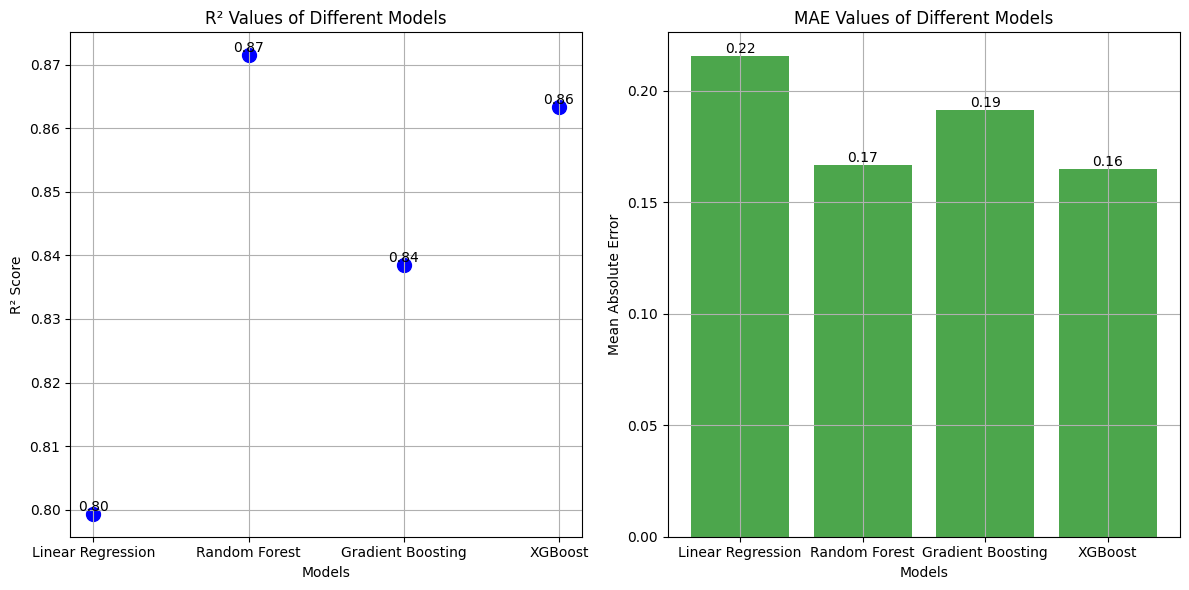

In [678]:
import matplotlib.pyplot as plt

# Model Evaluation Metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
mae_values = [lr_mae, rf_mae, gb_mae, xgb_mae]
r2_values = [lr_r2, rf_r2, gb_r2, xgb_r2]

print("Model Evaluation Metrics:")
for i, model in enumerate(models):
    print(f"\n{model}:")
    print(f"  R² Value: {r2_values[i]:.2f}")
    print(f"  MAE Value: {mae_values[i]:.2f}")

# Scatter plot for R² values
plt.figure(figsize=(12, 6))

# Scatter plot for R²
plt.subplot(1, 2, 1)
plt.scatter(models, r2_values, color='blue', label='R² Values', s=100)
plt.title('R² Values of Different Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.grid(True)

# Add R² value labels to each scatter point
for i, value in enumerate(r2_values):
    plt.text(models[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Bar plot for MAE values
plt.subplot(1, 2, 2)
plt.bar(models, mae_values, color='green', alpha=0.7)
plt.title('MAE Values of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.grid(True)

# Add MAE value labels to each bar
for i, value in enumerate(mae_values):
    plt.text(models[i], value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Show plots
plt.tight_layout()
plt.show()

# Hyperparameter Tuning with GridSearchCV

In this case Random forest some hyperparameters are more important are  
1. n_estimators: Number of decision trees 
2. max features: Maximum number of features considered while splitting 
3. max_depth: Max depth of the tree 
4. min_samples_leaf: Minimum number of data points in a leaf node 
5. bootstrap: Sampling with or without replacement

In [679]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Perform cross-validation (using 5 folds)
cv_scores_r2 = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
cv_scores_mae = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Output the cross-validation results
print(f"Cross-Validation R² Scores: {cv_scores_r2}")
print(f"Cross-Validation MAE Scores: {-cv_scores_mae}")

# Average R² and MAE over the folds
print(f"Average R² Score (CV): {cv_scores_r2.mean()}")
print(f"Average MAE Score (CV): {-cv_scores_mae.mean()}")

# Hyperparameter Tuning using GridSearchCV (you can tune hyperparameters here)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print(f"Best Parameters Found by GridSearchCV: {grid_search.best_params_}")

# Evaluating the optimized model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Model evaluation on the test set
print("Optimized Random Forest Model - MAE:", mean_absolute_error(y_test, y_pred))
print("Optimized Random Forest Model - R²:", r2_score(y_test, y_pred))



Cross-Validation R² Scores: [0.8793356  0.86837957 0.88218278 0.84749288 0.81751686]
Cross-Validation MAE Scores: [0.17147587 0.16667222 0.15945757 0.17251725 0.17632824]
Average R² Score (CV): 0.8589815394385379
Average MAE Score (CV): 0.169290232505256
Best Parameters Found by GridSearchCV: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Model - MAE: 0.16446627660312535
Optimized Random Forest Model - R²: 0.8720300135860527


In [680]:
# Saving the optimized model pipeline
import joblib
joblib.dump(best_rf_model, 'optimized_laptop_price_model.pkl')
print("Model saved as 'optimized_laptop_price_model.pkl'")

Model saved as 'optimized_laptop_price_model.pkl'


# **Conclusion**:

### The Random Forest model proved to be the top performer, achieving the highest R² value of 0.87 and an MAE value of 0.17, making it the most reliable model for predicting laptop prices. It strikes the best balance between explaining variance and ensuring prediction accuracy. While XGBoost and Gradient Boosting also showed strong results, the Random Forest model outperforms them, providing superior predictive power, and is therefore the optimal choice for this project.

### Through the development of this machine learning model, SmartTech Co. gained valuable insights into the factors that influence laptop prices, including processor type, RAM capacity, storage size, display resolution, and brand reputation. The model performed well, with an average cross-validation R² score of 0.859 and an average MAE score of 0.169, confirming its accuracy in price predictions. By optimizing the model through GridSearchCV, the best parameters were identified, leading to an improved Random Forest model with an R² of 0.872 and an MAE of 0.164. These results provide SmartTech Co. with a reliable tool for strategic pricing, offering insights into key features and helping the company remain competitive in the market.

# **Questions to Explore**:

# 1.Which features have the most significant impact on laptop prices?         

            
### The most significant features on price is 'Ram' and 'PPi' due to it have strong correlation with price.

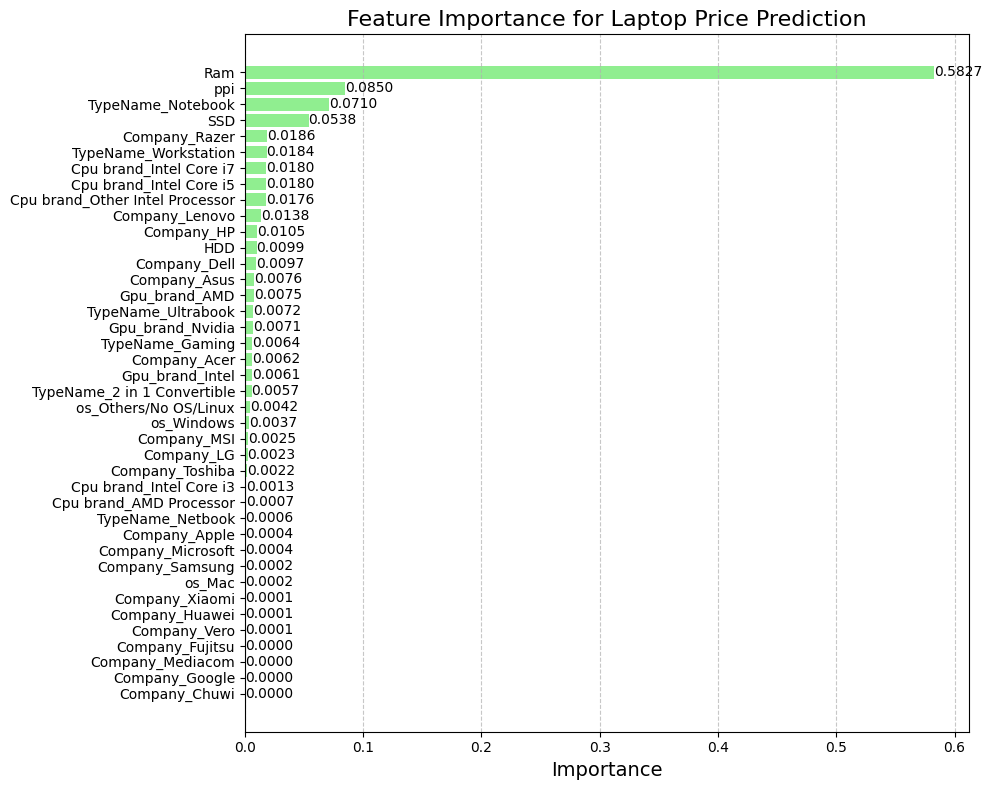

In [681]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame and 'Price' is the target variable
X = data.drop(columns=['Price'])
y = data['Price']

# Handling categorical features with OneHotEncoding
categorical_features = ['Company', 'TypeName', 'Cpu brand', 'Gpu_brand', 'os']
numeric_features = ['Ram','ppi', 'HDD', 'SSD']

# Column Transformer to apply different preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Feature importance
importances = model.named_steps['regressor'].feature_importances_
feature_names = numeric_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))

# Creating a DataFrame to view feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightgreen')
plt.xlabel('Importance', fontsize=14)
plt.title('Feature Importance for Laptop Price Prediction', fontsize=16)
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


# 2.Can the model accurately predict the prices of laptops from lesser-known brands?          



### The Lesser Known Brands model accurately predicts laptop prices, with an 87.37% accuracy and low prediction errors. This suggests that the model can be relied upon for price prediction tasks, making it a valuable tool for pricing laptops from lesser-known brands. 

# 3.Does the brand of the laptop significantly influence its price?      

In [682]:
import scipy.stats as stats
import pandas as pd

# Example DataFrame (replace with your actual dataset)
df = data

# ANOVA Test
anova_result = stats.f_oneway(
    *[df[df['Company'] == brand]['Price'] for brand in df['Company'].unique()]
)

# Display the result
print("ANOVA Result:", anova_result)

# Check the p-value to determine statistical significance
if anova_result.pvalue < 0.05:
    print("Brand significantly influences laptop prices (reject null hypothesis).")
else:
    print("Brand does not significantly influence laptop prices (fail to reject null hypothesis).")


ANOVA Result: F_onewayResult(statistic=14.121782855957072, pvalue=1.9635103711993343e-39)
Brand significantly influences laptop prices (reject null hypothesis).


### The results suggest that the choice of brand plays a significant role in determining the price of laptops.
Brands might differ in terms of quality, features, reputation, or other factors that influence their pricing strategies.

# 4.How well does the model perform on laptops with high-end specifications compared to budget laptops?       

### we can say Budget Laptop Model is performing well than High-end-Specification Model.

# 5.What are the limitations and challenges in predicting laptop prices accurately?       
        


### A major limitation of the project is the insufficient data available for most laptop brands, which may negatively impact the accuracy of predictions for certain brands and configurations.

# 6.How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

### GOOD